In [ ]:
# Standard stack of imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer # used to fill missing values, fits into pipelines
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [347]:
train = pd.read_csv('../raw_data/train.csv')
test = pd.read_csv('../raw_data/test.csv')

In [350]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [353]:
train.info()
train.isnull().sum()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# big gap between lowest and highest far
# some people get on for free?
# which features are not useful?
# lots of outliers for distribution of fare

# df_num = train.select_dtypes(include=['int64', 'float64'])

df_num = train[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']]
df_cat = train[['Pclass', 'Sex', 'Embarked', 'Cabin', 'Ticket']]

<Axes: >

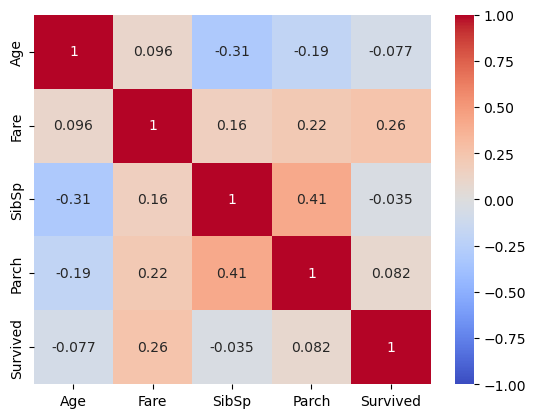

In [361]:
sns.heatmap(df_num.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')

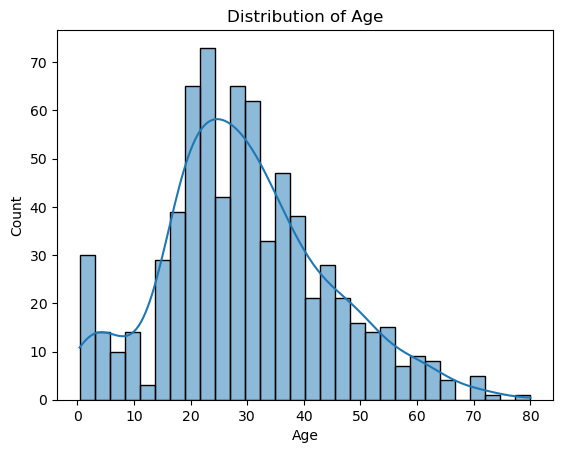

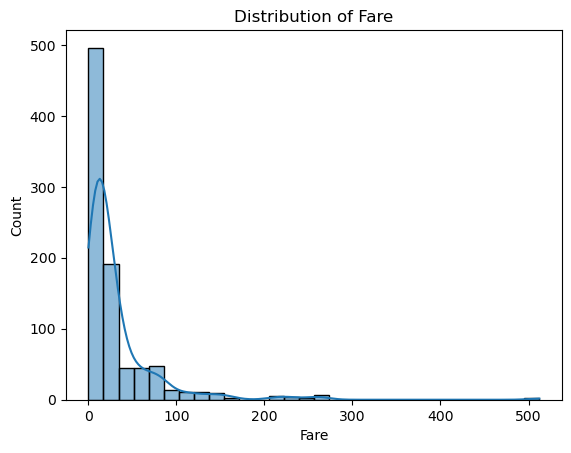

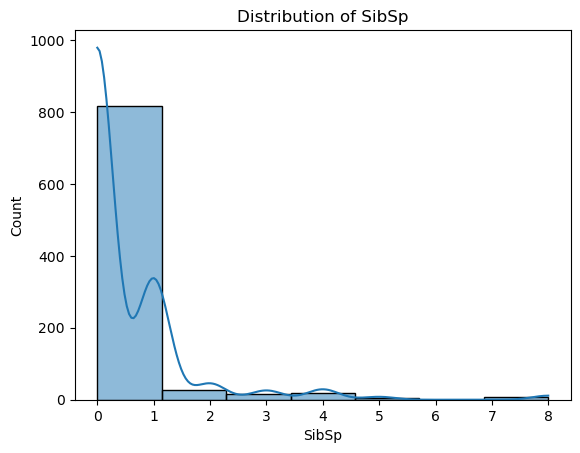

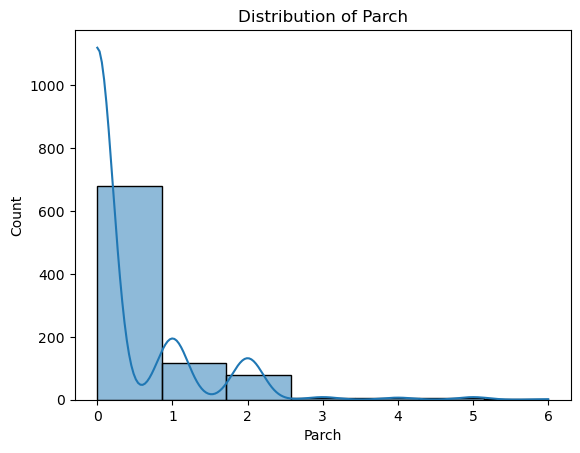

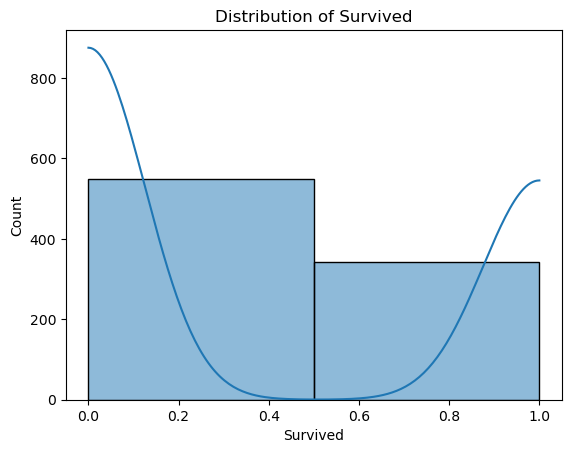

In [365]:
for col in df_num.columns:
    bins = min(30, df_num[col].nunique())
    sns.histplot(df_num[col], bins=bins, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

C:\Users\benla\AppData\Local\Temp\ipykernel_16848\1932971321.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, data=train, estimator='mean', ci=None)
C:\Users\benla\AppData\Local\Temp\ipykernel_16848\1932971321.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, data=train, estimator='mean', ci=None)
C:\Users\benla\AppData\Local\Temp\ipykernel_16848\1932971321.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, data=train, estimator='mean', ci=None)
C:\Users\benla\AppData\Local\Temp\ipykernel_16848\1932971321.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, data=train, estimator='mean', ci=None)
C:\Users\benla\AppData\Local\Temp\ipykernel_16848\1932971321.py:2: FutureWarning: 

The `ci` parameter is deprecated. Us

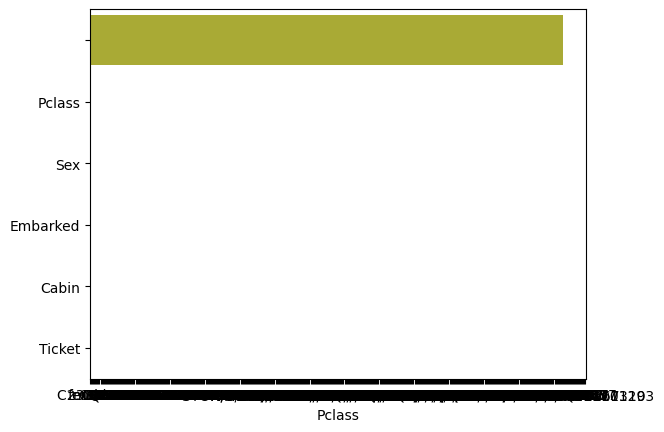

In [374]:
for col in df_cat.columns:
    sns.barplot(x=col, data=train, estimator='mean', ci=None)
    sns.barplot(col) 